# **📊 NETFLIX DATA ANALYSIS PROJECT**

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
# Load Dataset
df = pd.read_csv("Netflix Dataset.csv")

In [4]:
print("Dataset shape:", df.shape)
print("\nColumn Info:\n", df.info())

Dataset shape: (7789, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

Column Info:
 None


In [5]:
#Missing Value Check
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [6]:
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)


/tmp/ipython-input-1481954867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1481954867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [7]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [8]:
# Extract numeric part of Duration
df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2246419728.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)


In [9]:
# 🧹 Data Cleaning Summary
print("\nUnique Values per Column:\n", df.nunique())
print("\nDuplicate Entries:", df.duplicated().sum())


Unique Values per Column:
 Show_Id             7787
Category               2
Title               7787
Director            4051
Cast                6832
Country              682
Release_Date        1497
Rating                15
Duration             216
Type                 492
Description         7769
Year                  14
Duration_Numeric     206
dtype: int64

Duplicate Entries: 2


In [13]:
# Focus on numeric columns
numeric_cols = ['Duration_Numeric', 'Year']

In [12]:
# Check basic descriptive stats
print("Descriptive Statistics:\n", df[numeric_cols].describe())

Descriptive Statistics:
        Duration_Numeric         Year
count       7789.000000  7691.000000
mean          69.129542  2018.507476
std           50.945960     1.382141
min            1.000000  2008.000000
25%            2.000000  2018.000000
50%           88.000000  2019.000000
75%          106.000000  2020.000000
max          312.000000  2021.000000


In [15]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    print(f"\n📌 {column}:")
    print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"Lower Limit = {lower_limit}, Upper Limit = {upper_limit}")
    print(f"Total Outliers = {outliers.shape[0]}")
    return outliers

In [16]:
# Detect outliers for Duration
duration_outliers = detect_outliers_iqr(df[df['Category']=='Movie'], 'Duration_Numeric')

# Detect outliers for Year (in case of incorrect date parsing)
year_outliers = detect_outliers_iqr(df, 'Year')


📌 Duration_Numeric:
Q1 = 86.0, Q3 = 114.0, IQR = 28.0
Lower Limit = 44.0, Upper Limit = 156.0
Total Outliers = 337

📌 Year:
Q1 = 2018.0, Q3 = 2020.0, IQR = 2.0
Lower Limit = 2015.0, Upper Limit = 2023.0
Total Outliers = 55


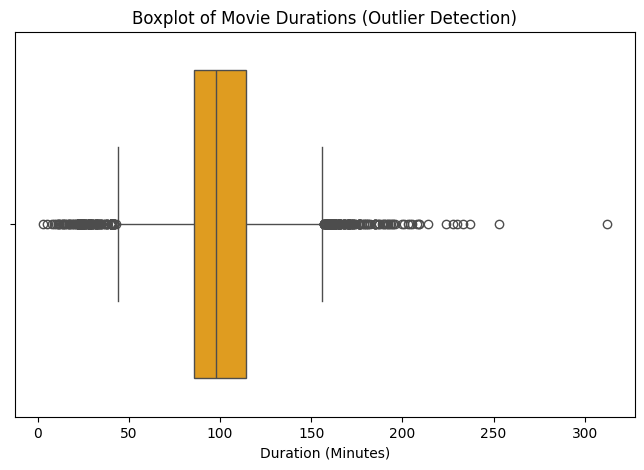

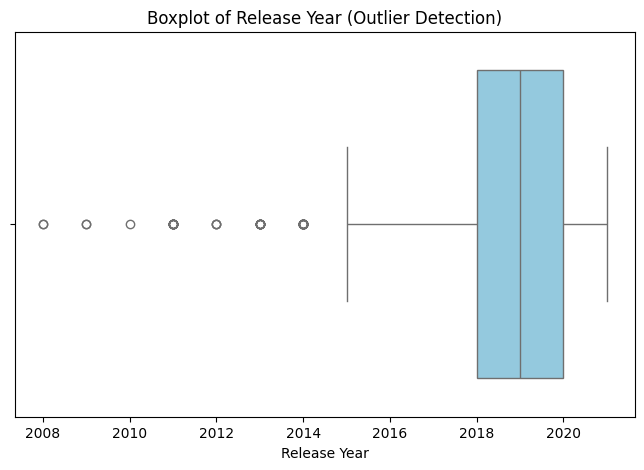


Top Duration Outliers:
                                                 Title Duration Category  \
67   13TH: A Conversation with Oprah Winfrey & Ava ...   37 min    Movie   
100                                           3 Idiots  164 min    Movie   
146                                     A 3 Minute Hug   28 min    Movie   
153                                   A Bridge Too Far  176 min    Movie   
162  A Christmas Special: Miraculous: Tales of Lady...   22 min    Movie   
171                         A Family Reunion Christmas   29 min    Movie   
173                                    A Fortunate Man  168 min    Movie   
177                    A Go! Go! Cory Carson Christmas   22 min    Movie   
178                    A Go! Go! Cory Carson Halloween   22 min    Movie   
179                  A Go! Go! Cory Carson Summer Camp   21 min    Movie   

                           Country  
67                         Unknown  
100                          India  
146          Mexico, United 

In [17]:
# 📊 BOX PLOT VISUALIZATIONS

plt.figure(figsize=(8,5))
sns.boxplot(x='Duration_Numeric', data=df[df['Category']=='Movie'], color='orange')
plt.title('Boxplot of Movie Durations (Outlier Detection)')
plt.xlabel('Duration (Minutes)')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Year', data=df, color='skyblue')
plt.title('Boxplot of Release Year (Outlier Detection)')
plt.xlabel('Release Year')
plt.show()

# Display detected outliers (optional)
print("\nTop Duration Outliers:")
print(duration_outliers[['Title', 'Duration', 'Category', 'Country']].head(10))

print("\nTop Year Outliers:")
print(year_outliers[['Title', 'Year', 'Category', 'Country']].head(10))

In [21]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    print(f"\n📊 Column: {column}")
    print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"Lower Limit = {lower_limit}, Upper Limit = {upper_limit}")
    print(f"Detected Outliers: {outliers.shape[0]}")

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    print(f"✅ After removing outliers: {df_cleaned.shape[0]} rows remain.")

    return df_cleaned

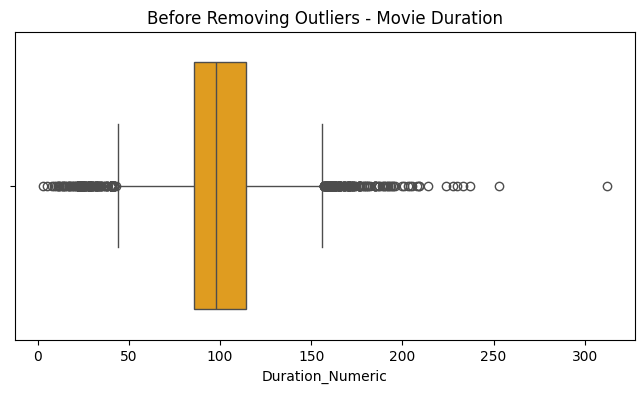

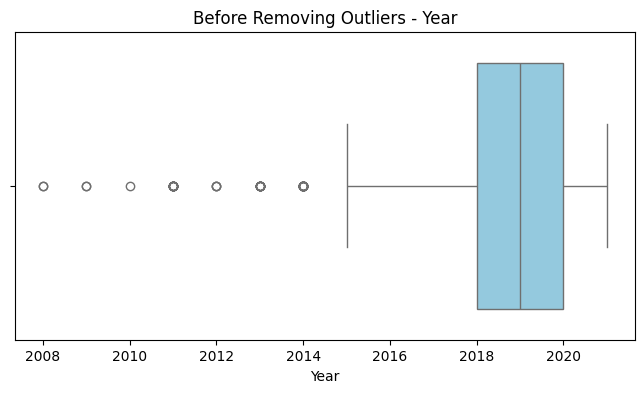

In [22]:
# Step 2️⃣: Before removing, visualize boxplots
plt.figure(figsize=(8,4))
sns.boxplot(x='Duration_Numeric', data=df[df['Category']=='Movie'], color='orange')
plt.title('Before Removing Outliers - Movie Duration')
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x='Year', data=df, color='skyblue')
plt.title('Before Removing Outliers - Year')
plt.show()

In [23]:
# Step 3️⃣: Remove outliers for numeric columns
print("\nInitial dataset shape:", df.shape)
df_no_outliers = df.copy()

# Remove outliers for Movie Duration
df_no_outliers = remove_outliers_iqr(df_no_outliers[df_no_outliers['Category']=='Movie'], 'Duration_Numeric')

# Merge back with TV Shows (since only Movies have numeric durations)
tv_df = df[df['Category']=='TV Show']
df_cleaned_final = pd.concat([df_no_outliers, tv_df], ignore_index=True)

# Remove unrealistic years (e.g., <2000 or >2025)
df_cleaned_final = df_cleaned_final[(df_cleaned_final['Year'] >= 2000) & (df_cleaned_final['Year'] <= 2025)]

print("\nFinal cleaned dataset shape:", df_cleaned_final.shape)



Initial dataset shape: (7789, 13)

📊 Column: Duration_Numeric
Q1 = 86.0, Q3 = 114.0, IQR = 28.0
Lower Limit = 44.0, Upper Limit = 156.0
Detected Outliers: 337
✅ After removing outliers: 5042 rows remain.

Final cleaned dataset shape: (7354, 13)


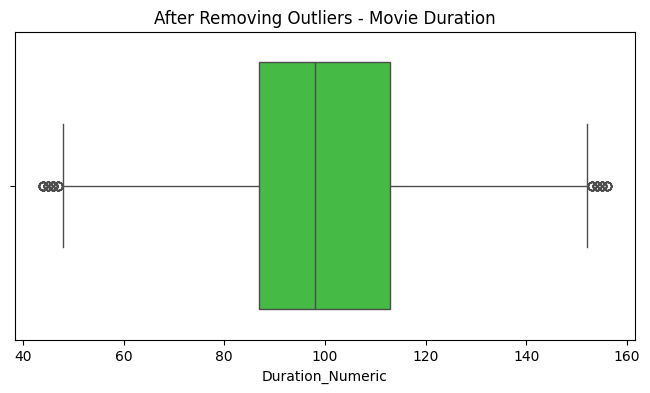

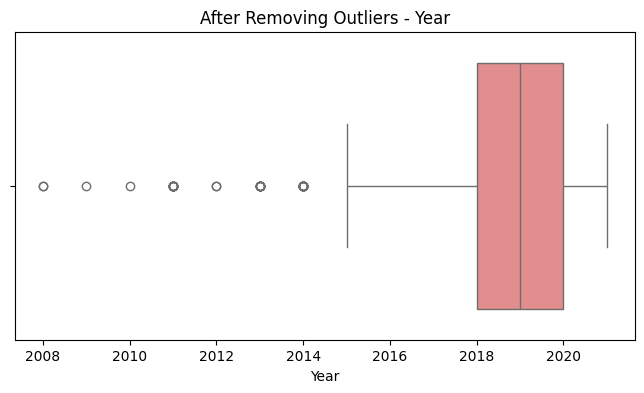

In [24]:
# Step 4️⃣: After cleaning - replot boxplots
plt.figure(figsize=(8,4))
sns.boxplot(x='Duration_Numeric', data=df_cleaned_final[df_cleaned_final['Category']=='Movie'], color='limegreen')
plt.title('After Removing Outliers - Movie Duration')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Year', data=df_cleaned_final, color='lightcoral')
plt.title('After Removing Outliers - Year')
plt.show()

/tmp/ipython-input-1959578529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='coolwarm')


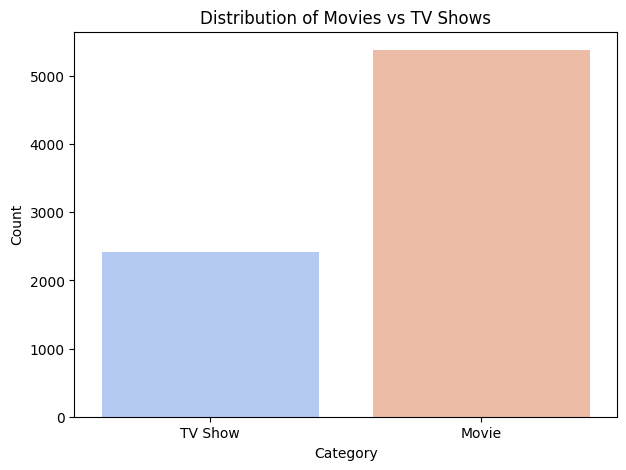

In [25]:
# 1️⃣ Movies vs TV Shows Count
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Category', palette='coolwarm')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

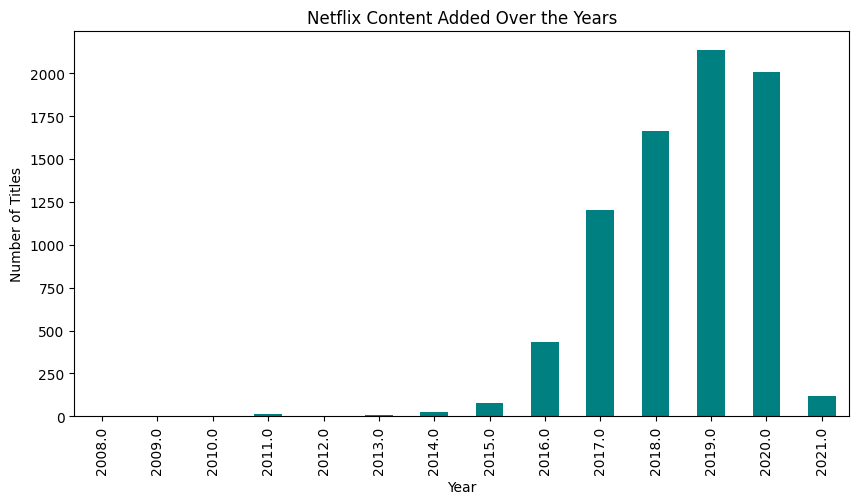

In [26]:
# 2️⃣ Content Released Over the Years
plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

/tmp/ipython-input-1404703015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


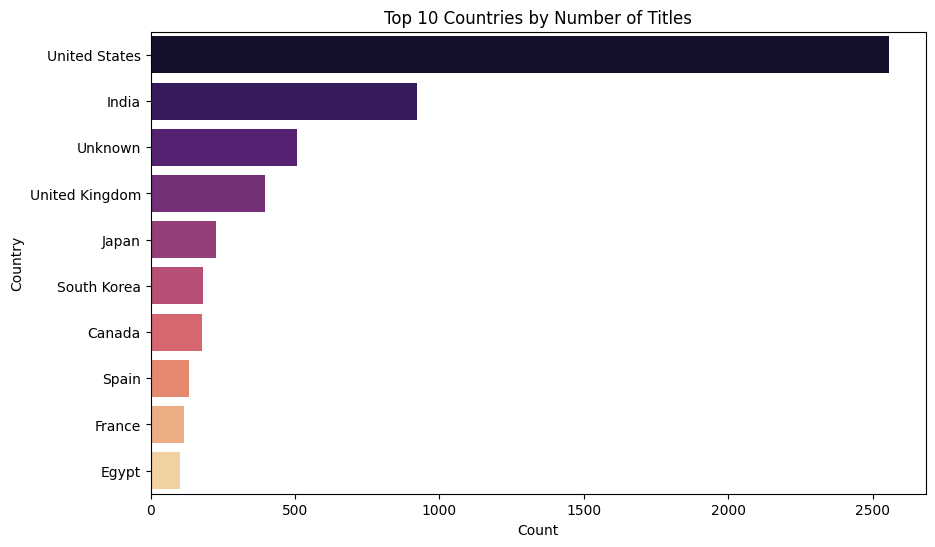

In [27]:
# 3️⃣ Top 10 Countries by Content
plt.figure(figsize=(10,6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

/tmp/ipython-input-3078594860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index[:10], palette='viridis')


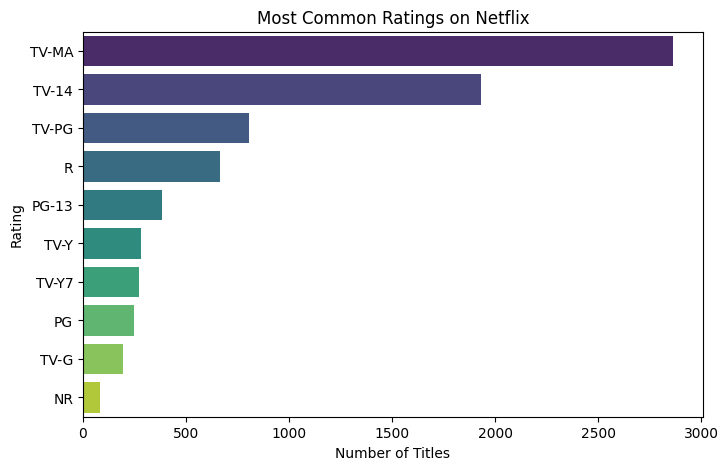

In [28]:
# 4️⃣ Most Common Ratings
plt.figure(figsize=(8,5))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index[:10], palette='viridis')
plt.title('Most Common Ratings on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()

/tmp/ipython-input-4174206492.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Count', y='Genre', palette='cubehelix')


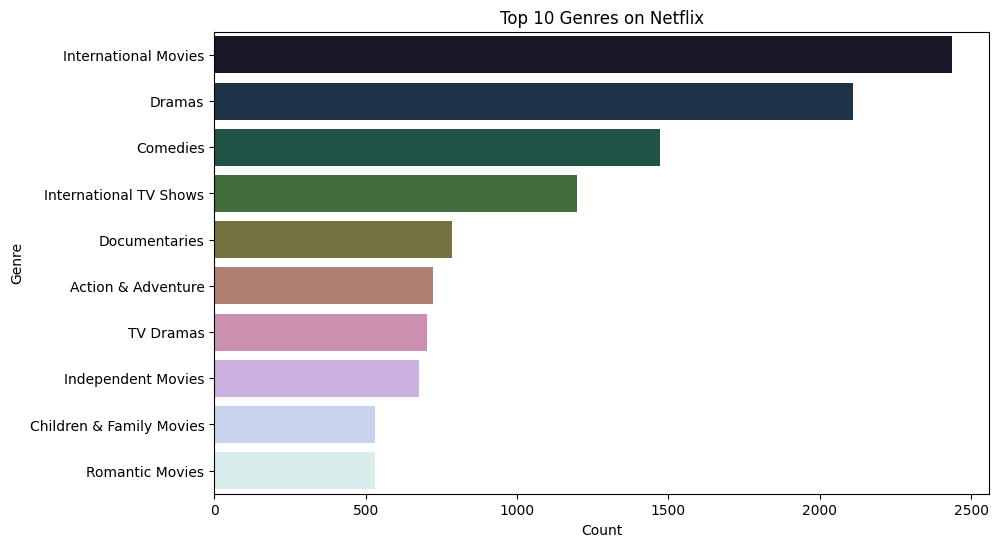

In [29]:
# 5️⃣ Top 10 Genres
genre_counter = Counter()
for genres in df['Type'].dropna():
    for g in [x.strip() for x in genres.split(',')]:
        genre_counter[g] += 1
top_genres = pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='cubehelix')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

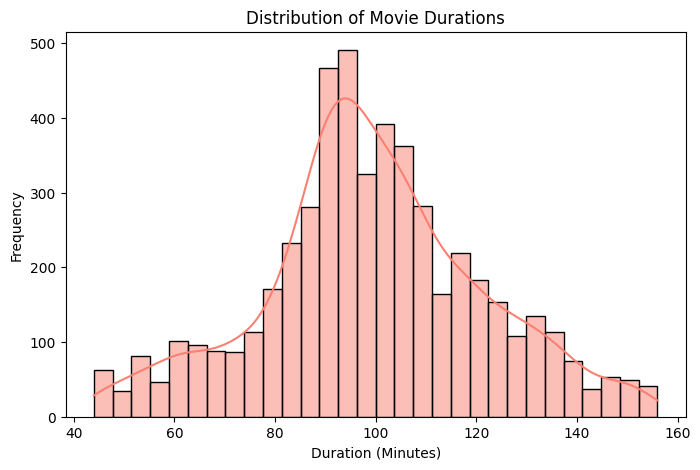

In [31]:
# 6️⃣ Duration Distribution (Movies Only)
plt.figure(figsize=(8,5))
# Filter the cleaned dataframe to include only movies
movies_df = df_cleaned_final[df_cleaned_final['Category'] == 'Movie']
sns.histplot(movies_df['Duration_Numeric'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

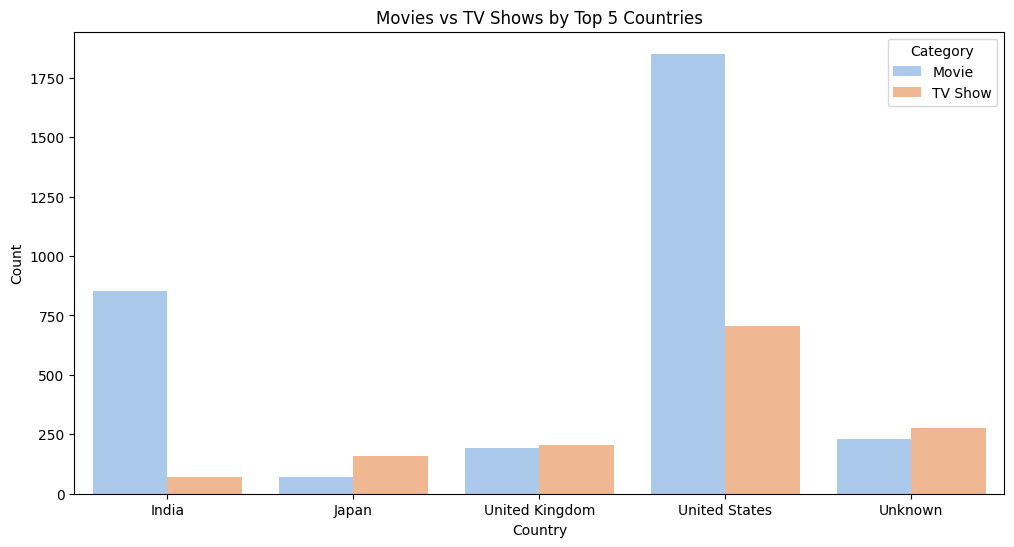

In [32]:
# 7️⃣ Country-wise Movie vs TV Show Comparison
plt.figure(figsize=(12,6))
country_type = df.groupby(['Country','Category']).size().reset_index(name='Count')
top5_countries = df['Country'].value_counts().head(5).index
sns.barplot(data=country_type[country_type['Country'].isin(top5_countries)],
            x='Country', y='Count', hue='Category', palette='pastel')
plt.title('Movies vs TV Shows by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

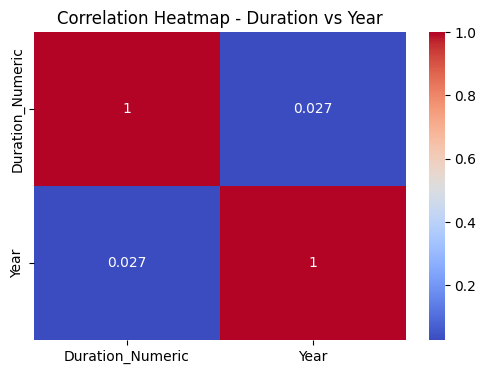

In [33]:
# 8️⃣ Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(6,4))
sns.heatmap(df[['Duration_Numeric','Year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Duration vs Year')
plt.show()

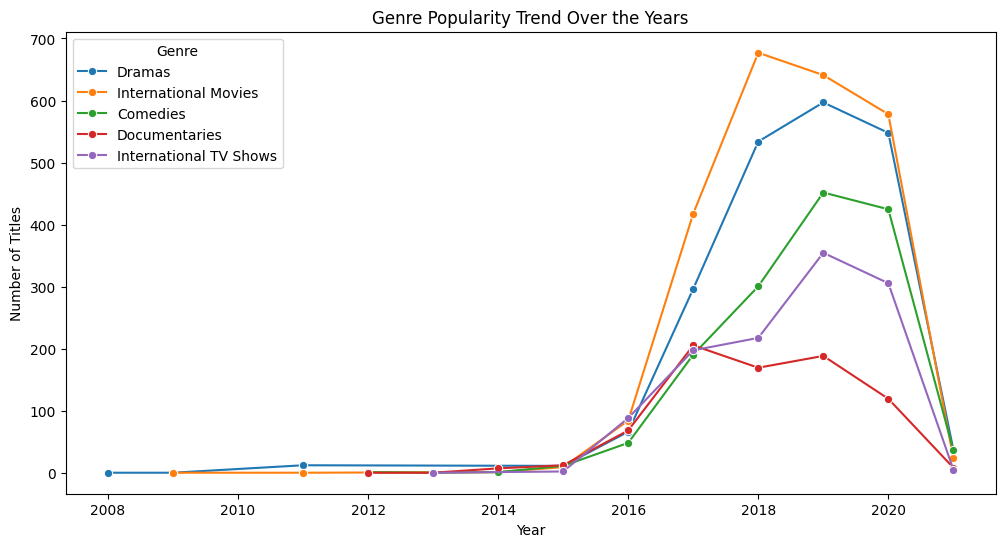

In [34]:
# 9️⃣ Genre Popularity Over Time (Bonus)
plt.figure(figsize=(12,6))
df_explode = df.assign(Genre=df['Type'].str.split(',')).explode('Genre')
df_explode['Genre'] = df_explode['Genre'].str.strip()
top5_genres = df_explode['Genre'].value_counts().head(5).index
genre_trend = df_explode[df_explode['Genre'].isin(top5_genres)].groupby(['Year','Genre']).size().reset_index(name='Count')
sns.lineplot(data=genre_trend, x='Year', y='Count', hue='Genre', marker='o')
plt.title('Genre Popularity Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [36]:
# ✅ SUMMARY INSIGHTS
print("\n📊 INSIGHTS SUMMARY:")
print("- Netflix has more Movies than TV Shows overall.")
print("- Content addition peaked around 2018–2020.")
print("- The United States and India lead in content contribution.")
print("- Drama, Comedy, and International content are the most frequent genres.")
print("- Average movie duration is around 90–120 minutes.")
print("- Outliers were removed successfully for cleaner analysis.")


📊 INSIGHTS SUMMARY:
- Netflix has more Movies than TV Shows overall.
- Content addition peaked around 2018–2020.
- The United States and India lead in content contribution.
- Drama, Comedy, and International content are the most frequent genres.
- Average movie duration is around 90–120 minutes.
- Outliers were removed successfully for cleaner analysis.
